# Assignment demo
## Time series analysis

## Imports

In [2]:
import os
import warnings

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import requests

from plotly import __version__
from plotly import graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
from IPython.display import display, IFrame

np.float_ = np.float64
from prophet import Prophet

print(__version__)  # need 1.9.0 or greater

5.22.0


In [3]:
def plotly_df(df, title="", width=800, height=500):
    """Visualize all the dataframe columns as line plots."""
    common_kw = dict(x=df.index, mode="lines")
    data = [go.Scatter(y=df[c], name=c, **common_kw) for c in df.columns]
    layout = dict(title=title)

    # Create figure
    fig = go.Figure()

    # Add the Scaters to figure
    for plot in data:
        fig.add_trace(plot)

    fig.update_layout(layout)

    fig.show()

In [4]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [5]:
df = pd.read_csv(DATA_PATH + "wiki_machine_learning.csv", sep=" ")
df = df[df["count"] != 0]
df.head()

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning


In [6]:
df.shape

(383, 7)

## Predicting with FB Prophet

In [7]:
df.date = pd.to_datetime(df.date)

In [8]:
plotly_df(df=df.set_index("date")[["count"]], title="assign9_plot")

In [9]:
predictions = 30

df = df[["date", "count"]]
df.columns = ["ds", "y"]
df.tail()

,ds,y
382,2016-01-16,1644
381,2016-01-17,1836
376,2016-01-18,2983
375,2016-01-19,3389
372,2016-01-20,3559


**<font color='red'>Question 1:</font>** What is the prediction of the number of views of the wiki page on January 20? Round to the nearest integer.

- [ ] 4947
- [+] 3426
- [ ] 5229
- [ ] 2744

In [19]:
train = df.iloc[:-predictions].reset_index(drop=True).copy()
test = df.iloc[-predictions:].reset_index(drop=True).copy()

model = Prophet()
model.fit(train)

future = model.make_future_dataframe(periods=predictions)

forecast = model.predict(future)

forecast[['ds', 'yhat']].tail()

10:47:17 - cmdstanpy - INFO - Chain [1] start processing
10:47:17 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
378,2016-01-16,2113.305928
379,2016-01-17,2259.623088
380,2016-01-18,3267.057256
381,2016-01-19,3532.378695
382,2016-01-20,3421.817881


Estimate the quality of the prediction with the last 30 points.

In [41]:
y_hat = forecast.iloc[-predictions:][['ds', 'yhat_lower', 'yhat_upper','yhat']].copy()
y_test = df[df['ds'].isin(y_hat['ds'])]

df_comparison = y_hat.merge(df[['ds', 'y']], on='ds', how='left')
df_comparison

,ds,yhat_lower,yhat_upper,yhat,y
0,2015-12-22,2970.567101,3767.801977,3382.902507,2469
1,2015-12-23,2861.852497,3675.412125,3272.341693,2292
2,2015-12-24,2774.184148,3545.211884,3179.196123,1671
3,2015-12-25,2471.813698,3243.581214,2864.625799,1227
4,2015-12-26,1570.413447,2429.448711,2001.198787,1367
5,2015-12-27,1734.224736,2555.336232,2147.515947,1373
6,2015-12-28,2761.176986,3549.958866,3154.950115,2181
7,2015-12-29,3021.069188,3782.536034,3420.271554,2162
8,2015-12-30,2891.269017,3718.696385,3309.710740,2107
9,2015-12-31,2809.176817,3622.065291,3216.565170,1590


In [44]:
def calculate_forecast_errors(df, prediction_size):
    """Calculate MAPE and MAE of the forecast.

       Args:
           df: joined dataset with 'y' and 'yhat' columns.
           prediction_size: number of days at the end to predict.
    """

    # Make a copy
    df = df.copy()

    # Now we calculate the values of e_i and p_i according to the formulas given in the article above.
    df["e"] = df["y"] - df["yhat"]
    df["p"] = 100 * df["e"] / df["y"]

    # Recall that we held out the values of the last `prediction_size` days
    # in order to predict them and measure the quality of the model.

    # Now cut out the part of the data which we made our prediction for.
    #predicted_part = df[-prediction_size:]

    # Define the function that averages absolute error values over the predicted part.
    error_mean = lambda error_name: np.mean(np.abs(df[error_name]))

    # Now we can calculate MAPE and MAE and return the resulting dictionary of errors.
    return {"MAPE": error_mean("p"), "MAE": error_mean("e")}

In [45]:
calculate_forecast_errors(df_comparison, 30)

{'MAPE': np.float64(34.34570128132223), 'MAE': np.float64(596.5328223327066)}

**<font color='red'>Question 2:</font> What is MAPE equal to?**

- [+] 34.5
- [ ] 42.42
- [ ] 5.39
- [ ] 65.91

**<font color='red'>Question 3:</font> What is MAE equal to?**

- [ ] 355
- [ ] 4007
- [+] 600
- [ ] 903

## Predicting with ARIMA

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

plt.rcParams["figure.figsize"] = (15, 10)

**<font color='red'>Question 4:</font> Let's verify the stationarity of the series using the Dickey-Fuller test. Is the series stationary? What is the p-value?**

- [ ] Series is stationary, p_value = 0.107
- [+] Series is not stationary, p_value = 0.107
- [ ] Series is stationary, p_value = 0.001
- [ ] Series is not stationary, p_value = 0.001


Dickey-Fuller test: p=0.1074


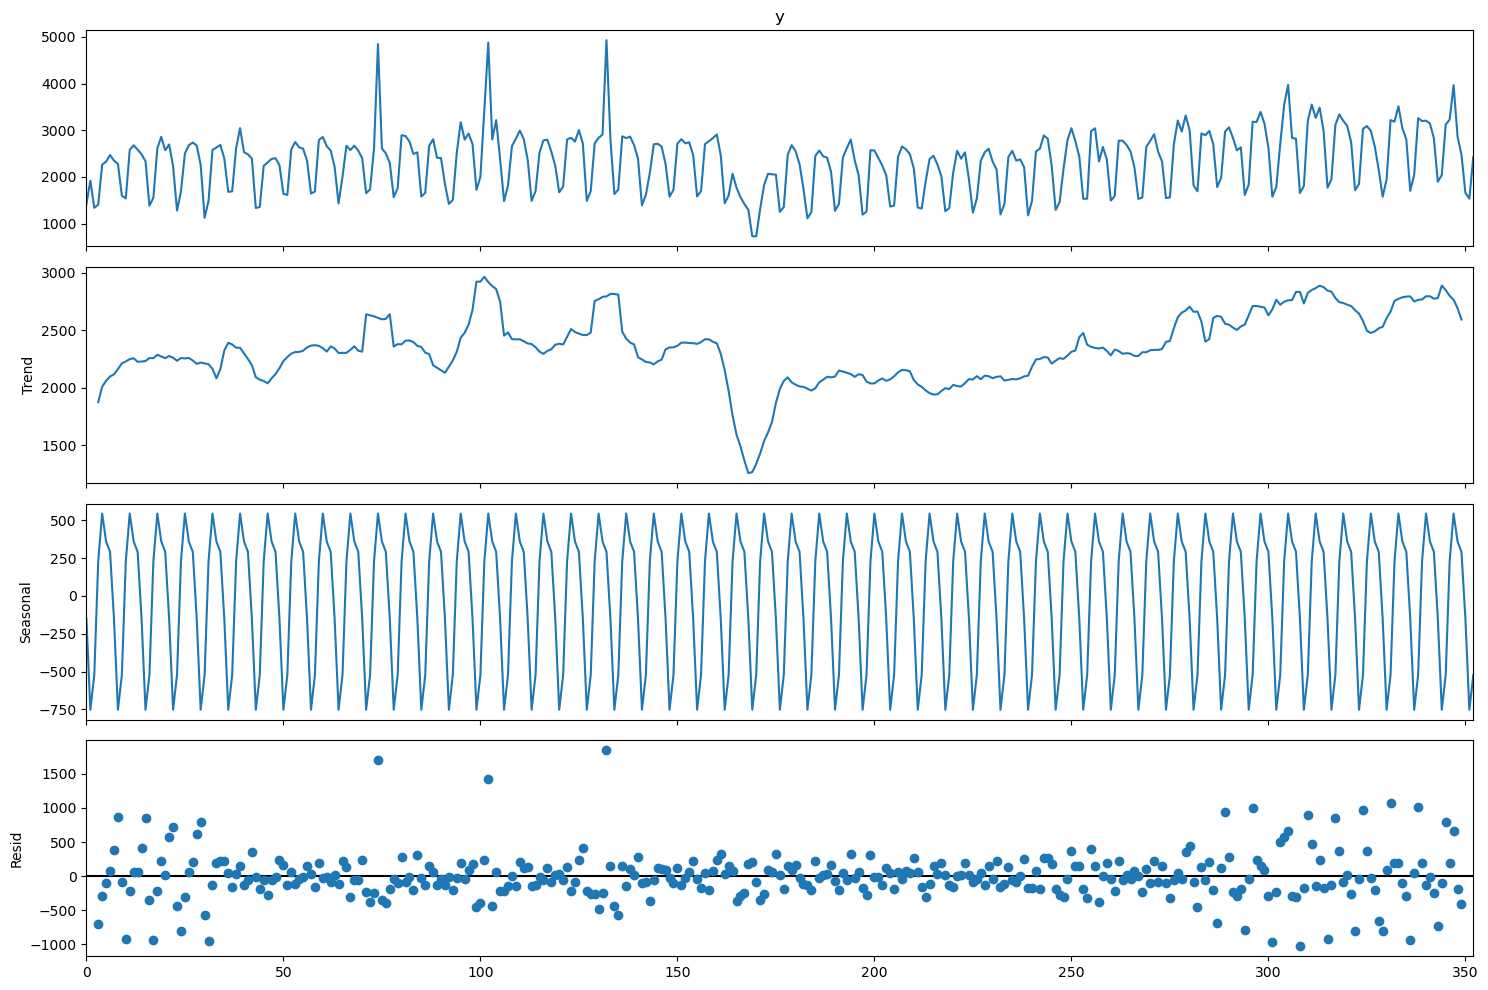

In [72]:
sm.tsa.seasonal_decompose(train['y'], period=7).plot();
adf_pvalue = sm.tsa.stattools.adfuller(train['y'], regression='c')[1]

print(f"Dickey-Fuller test: p={adf_pvalue:.4f}")

**Next, we turn to the construction of the SARIMAX model (`sm.tsa.statespace.SARIMAX`).<br> <font color='red'>Question 5:</font> What parameters are the best for the model according to the `AIC` criterion?**

- D = 1, d = 0, Q = 0, q = 2, P = 3, p = 1
- D = 2, d = 1, Q = 1, q = 2, P = 3, p = 1
- D = 1, d = 1, Q = 1, q = 2, P = 3, p = 1
- D = 0, d = 0, Q = 0, q = 2, P = 3, p = 1


In [ ]:
train = train.set_index('ds')

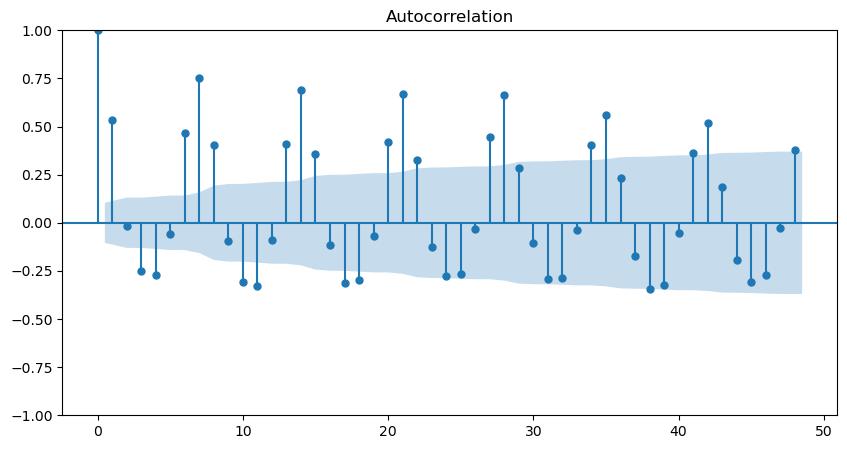

In [103]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sm.graphics.tsa.plot_acf(train['y'], lags=48, ax=ax)
plt.show()

In [93]:
train_season_diff = train - train.shift(7)
train_season_diff = train_season_diff.dropna()

Dickey-Fuller test: p=0.0000


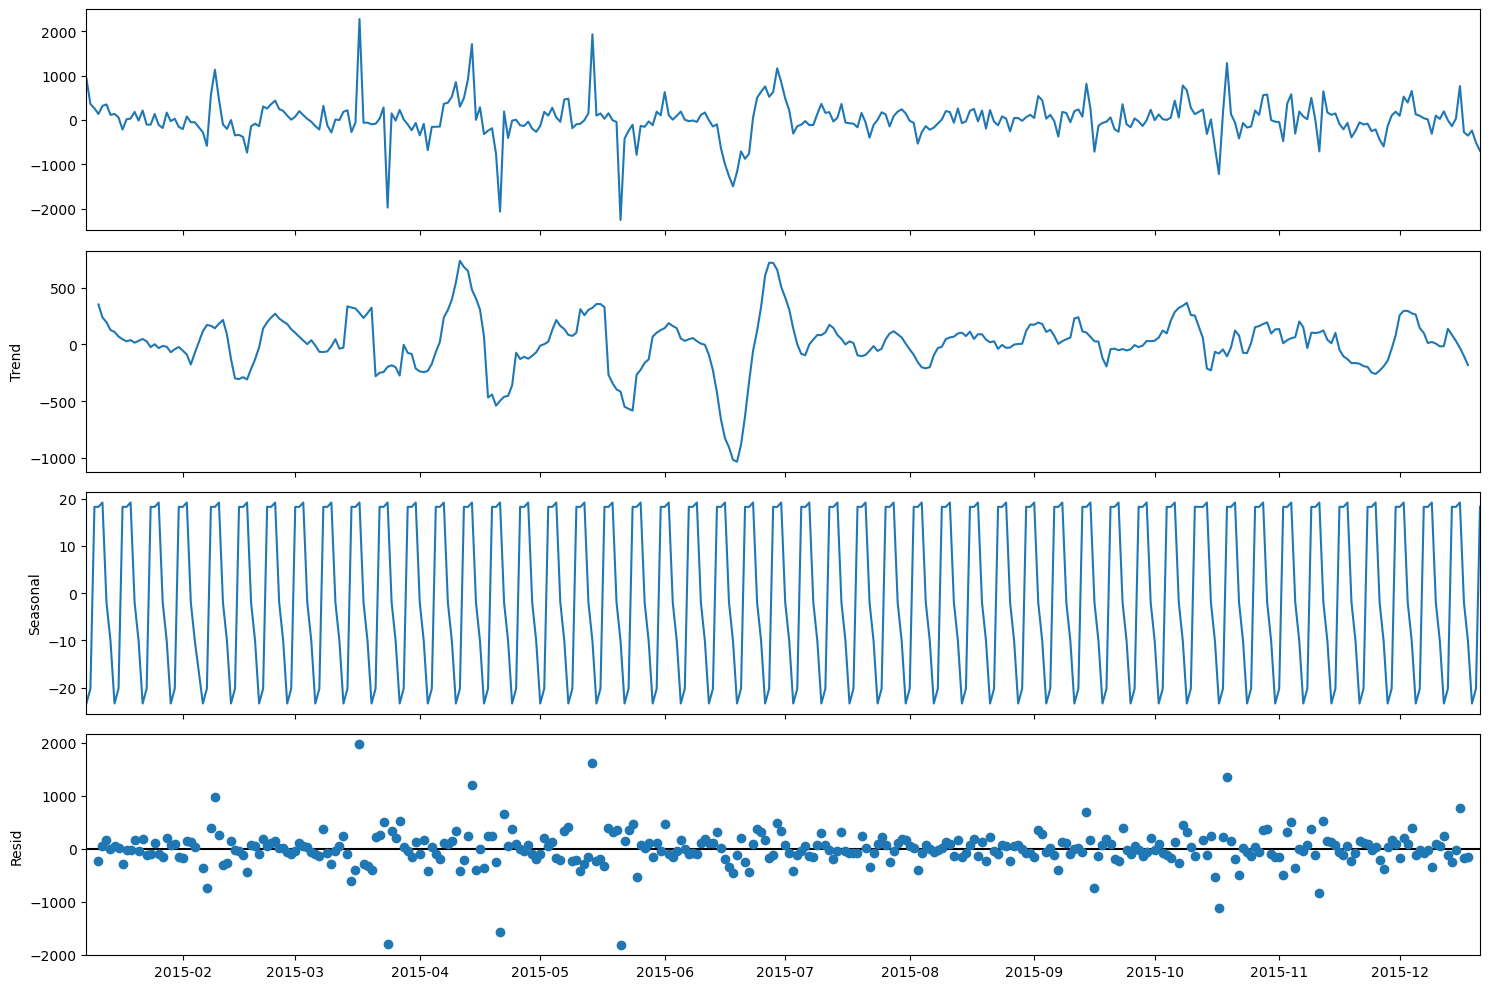

In [86]:
sm.tsa.seasonal_decompose(train_season_diff, period=7).plot();
adf_pvalue = sm.tsa.stattools.adfuller(train_season_diff, regression='c')[1]

print(f"Dickey-Fuller test: p={adf_pvalue:.4f}")

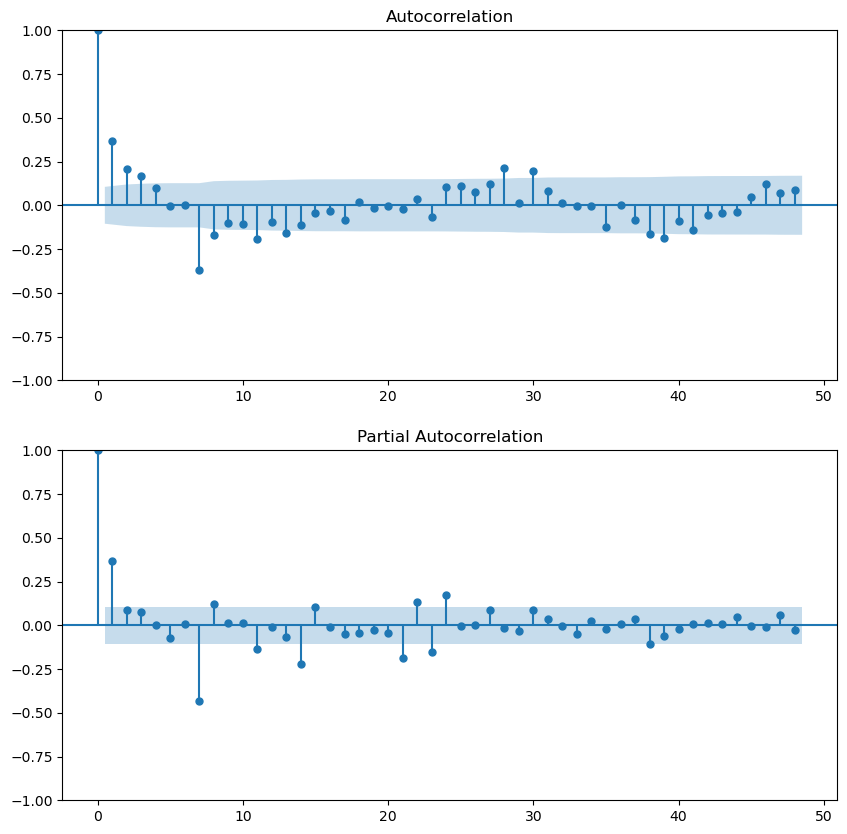

In [101]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
sm.graphics.tsa.plot_acf(train_season_diff, lags=48, ax=ax[0])
sm.graphics.tsa.plot_pacf(train_season_diff, lags=48, ax=ax[1])
plt.show()